# 匯入資料
#### 以random方式抽取5000000筆樣本數

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize']=(10, 6)

def read_csv_random_sample(path, nrows):
    total_rows_in_file_minus_header = sum(1 for line in open(path)) - 1
    skip_mask = random.sample(
        population=range(1, total_rows_in_file_minus_header + 1),
        k=total_rows_in_file_minus_header - nrows
    )
    return pd.read_csv(path, skiprows=skip_mask)

train = read_csv_random_sample(path="/Users/laikuanhung/Desktop/Kaggle/train_ver2.csv", nrows=5000000)

# 定義目標欄位
#### 選取每位顧客擁有的產品

In [5]:
PRODUCT_COLUMNS = [column for column in train.columns if column.endswith('ult1')]
print PRODUCT_COLUMNS

['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


#### 將每位顧客持有產品總數進行加總

In [21]:
train = train.assign(sum_of_products_owned = lambda df: df[PRODUCT_COLUMNS].sum(axis=1))


In [22]:
train

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,sum_of_products_owned
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
2,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
3,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
4,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
5,2015-01-28,1050623,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
6,2015-01-28,1050610,N,ES,V,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
7,2015-01-28,1050609,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
8,2015-01-28,1050592,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0
9,2015-01-28,1050602,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1.0


#### 並依照日期欄位進行切分，並取出每位顧客平均持有產品數量
#### 從結果可以發現，從2015-06-28到2015-07-28，每個顧客的平均產品數量隨著時間而減少。 

In [23]:
train.groupby('fecha_dato')['sum_of_products_owned'].mean()

fecha_dato
2015-01-28    1.769357
2015-02-28    1.777045
2015-03-28    1.780624
2015-04-28    1.781455
2015-05-28    1.776745
2015-06-28    1.788409
2015-07-28    1.384614
2015-08-28    1.364691
2015-09-28    1.355795
2015-10-28    1.343165
2015-11-28    1.334761
2015-12-28    1.335288
2016-01-28    1.313493
2016-02-28    1.332148
2016-03-28    1.329909
2016-04-28    1.327603
2016-05-28    1.331935
Name: sum_of_products_owned, dtype: float64

#### 找出每項持有產品於每個時間點的數量

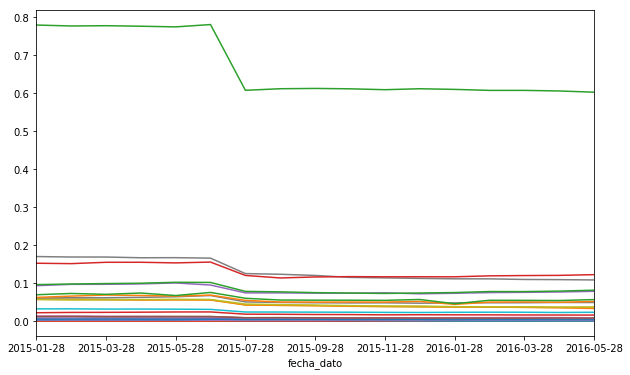

In [25]:
for product in PRODUCT_COLUMNS:
    train.groupby('fecha_dato')[product].mean().plot()

#### 排除顧客持有最高占比的產品：ind_cco_fin_ult1(活存戶)

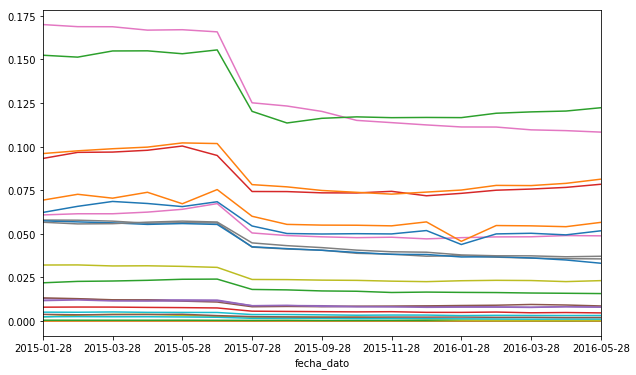

In [26]:
for product in PRODUCT_COLUMNS:
    if product != 'ind_cco_fin_ult1':
        train.groupby('fecha_dato')[product].mean().plot()

#### 列出所有時間點，顧客持有產品總數
#### 所有顧客擁有的產品總數隨著時間的演進而增加。

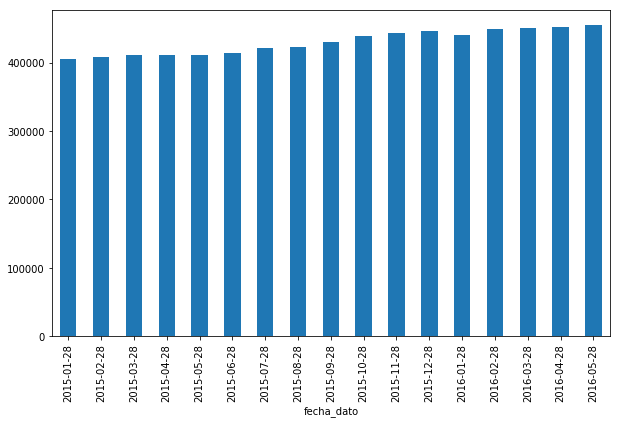

In [27]:
train.groupby('fecha_dato')['sum_of_products_owned'].sum().plot(kind='bar')

# 結論
#### 隨著時間的演進，我們增加了更多的顧客，但是這些顧客中，每一位持有的產品也越來越少
#### 越新加入的顧客平均持有產品數越低